In [1]:
import networkx as nx
from force_atlas_layout import forceatlas2,ForceAtlas2

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

import ipywidgets as widgets
from IPython.display import HTML,Image
from IPython.display import display,clear_output

import warnings
from numba import NumbaDeprecationWarning,NumbaWarning
warnings.filterwarnings("ignore",category=NumbaDeprecationWarning)
warnings.filterwarnings("ignore",category=NumbaWarning)

In [9]:
G = nx.read_gexf("../stance-detection-over-energy-in-twitter/dataset/network/rt_10_ot_10_retweeted_graph.gexf")
node_size = [G.degree(n) for n in G]

# Compute and plot graph with ForceAtlas2

100%|██████████| 100/100 [00:22<00:00,  4.38it/s]


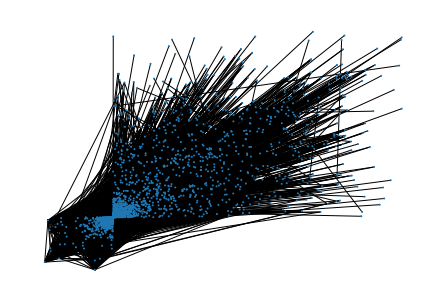

In [39]:

nx.draw(G,
        pos=forceatlas2(
            G, nb_iter=100,barnes_hut_optimize=True,adjust_sizes=True,
            verbose=True, scaling_ratio=1,gravity=1,
            sizes=nx.degree(G)
        ),
        node_size=[1 for n in G],edge_width=0
        )
plt.show()

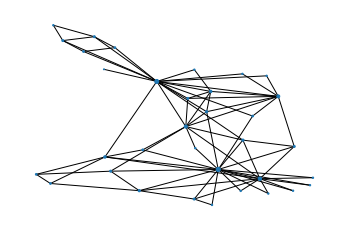

In [8]:
fig, ax = plt.subplots()

fa = ForceAtlas2(G,barnes_hut_optimize=False, scaling_ratio=1)
fa.iteration()
nx.draw(G,pos=fa.get_positions(),node_size=node_size)
    
def update(frame):
    ax.clear()
    fa.iteration()
    nx.draw(G,pos=fa.get_positions(),node_size=node_size,ax=ax)

    

ani = FuncAnimation(fig, update, frames=100,repeat=True)
ani.save("animation_fa2.gif")
#display(Image(filename="animation_fa2.gif"))
display(HTML(ani.to_html5_video()))


In [6]:
widget = widgets.Button(description="+1 iteration")
widget2 = widgets.Button(description="+2 iterations")
widget3 = widgets.Button(description="+3 iterations")

out = widgets.Output()
fa = ForceAtlas2(G,lin_log_mode=False, barnes_hut_optimize=True, scaling_ratio=1,normalize_edge_weights=False,adjust_sizes=True)


def iterate(x):
    def foo(j):
        with out:
            fig,ax = plt.subplots(figsize=(10,10))
            for i in range(x):
                fa.iteration()
            clear_output()
            nx.draw(G,pos=fa.get_positions(),ax=ax)
            plt.show()
    return foo
widget.on_click(iterate(1))
widget2.on_click(iterate(2))
widget3.on_click(iterate(3))
display(widget,widget2,widget3,out)

Button(description='+1 iteration', style=ButtonStyle())

Button(description='+2 iterations', style=ButtonStyle())

Button(description='+3 iterations', style=ButtonStyle())

Output()